In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from Pytorch_dataset import DimReduction_dataset
from utils import RMSELoss, pred_inverse_transform
from torchmetrics.functional import mean_absolute_percentage_error

if torch.cuda.is_available():
    device = torch.device('cuda')
    print('cuda is available')

def model_evaluate(model, batch_size=32, model_num=0, norm=True):
    # load train data
    train_dataset = DimReduction_dataset(train=True, pred_target='chargetime', norm=True)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

    # load test data
    test_dataset = DimReduction_dataset(train=False, pred_target='chargetime', norm=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # RMSE
    rmse = RMSELoss()

    model = model.to(device)
    train_rmse_lst = []
    test_rmse_lst = []
    train_mape_lst = []
    test_mape_lst = []
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(train_loader):
            inputs = inputs.to(device)
            targets = targets
            outputs = model(inputs)
            if norm:
                outputs = pred_inverse_transform(outputs.cpu(), train=True, pred_target='chargetime').cuda()
                targets = pred_inverse_transform(targets, train=True, pred_target='chargetime')

            mape_train = mean_absolute_percentage_error(outputs, targets.view(-1, 1).cuda())
            rmse_train = rmse(outputs, targets.view(-1, 1).cuda())
            
            train_rmse_lst.append(rmse_train.item())
            train_mape_lst.append(mape_train.item())
            if i == 0:
                plt.plot(outputs.cpu(), targets, 'ro', markersize=2.5, label='train')
            else:
                plt.plot(outputs.cpu(), targets, 'ro', markersize=2.5)
        print(f'Training set|RMSE: {np.average(train_rmse_lst):.2f}, MAPE: {np.average(train_mape_lst):.2f}')

        for i, (inputs, targets) in enumerate(test_loader):
            inputs = inputs.to(device)
            targets = targets
            outputs = model(inputs)
            if norm:
                outputs = pred_inverse_transform(outputs.cpu(), train=False, pred_target='chargetime').cuda()
                targets = pred_inverse_transform(targets, train=True, pred_target='chargetime')
            
            mape_test = mean_absolute_percentage_error(outputs, targets.view(-1, 1).cuda())
            rmse_test = rmse(outputs, targets.view(-1, 1).cuda())
            
            test_rmse_lst.append(rmse_test.item())
            test_mape_lst.append(mape_test.item())
            # plot
            if i == 0:
                plt.plot(outputs.cpu(), targets, 'bo', markersize=2.5, label='valid')
            else:
                plt.plot(outputs.cpu(), targets, 'bo', markersize=2.5)
        print(f'Testing set|RMSE: {np.average(test_rmse_lst):.2f}, MAPE: {np.average(test_mape_lst):.2f}')
        
        plt.title('Chargetime model_'+str(model_num))
        plt.plot([12.5, 27.5], [12.5, 27.5], 'k--', linewidth=1.0)
        plt.xlabel('predicted (mins)')
        plt.ylabel('ground truth (mins)')
        plt.legend()
        plt.savefig('Figures/ct_model'+str(model_num)+'.jpg')


c:\Users\smcmlab4\Anaconda3\envs\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda is available


# New

Training set|RMSE: 0.75, MAPE: 0.03
Testing set|RMSE: 0.71, MAPE: 0.03


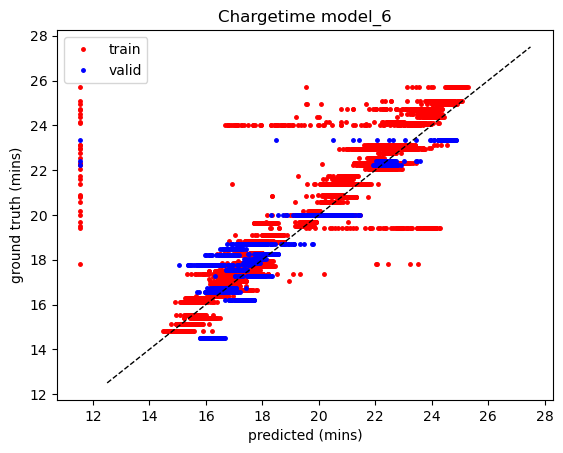

In [2]:
FILE = 'Model/ct_model_new_1.pth'
ct_model = torch.load(FILE)
ct_model.eval()
model_evaluate(ct_model, batch_size=32, model_num=6)

## norm=True

Training set|RMSE: 0.90, MAPE: 0.04
Testing set|RMSE: 1.85, MAPE: 0.09


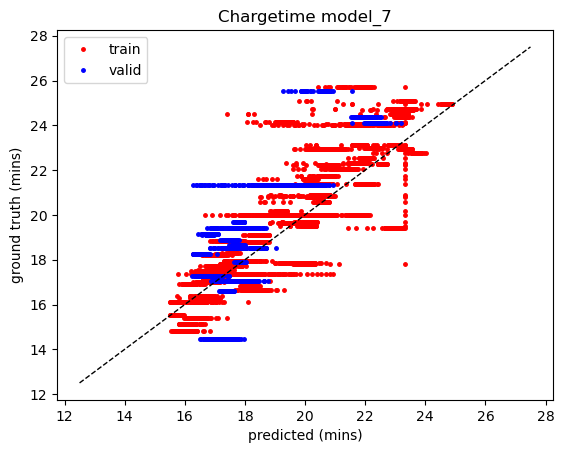

In [5]:
FILE = 'Model/ct_model_new_2.pth'
ct_model = torch.load(FILE)
ct_model.eval()
model_evaluate(ct_model, batch_size=32, model_num=7, norm=True)

Training set|RMSE: 0.92, MAPE: 0.04
Testing set|RMSE: 1.66, MAPE: 0.08


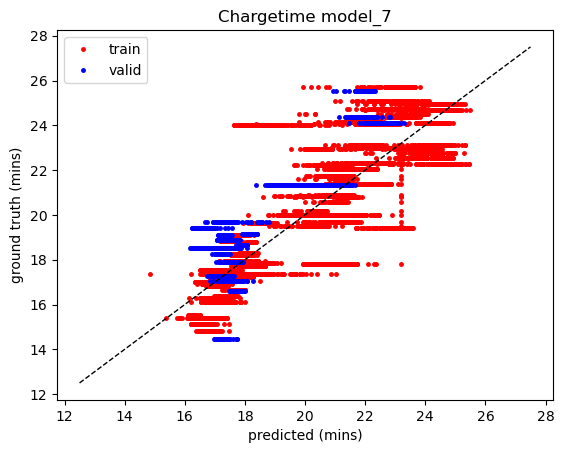

In [2]:
FILE = 'Model/ct_model_new_3.pth'
ct_model = torch.load(FILE)
ct_model.eval()
model_evaluate(ct_model, batch_size=32, model_num=7, norm=True)

# Old

Training set|RMSE: 0.95, MAPE: 0.04
Testing set|RMSE: 0.77, MAPE: 0.04


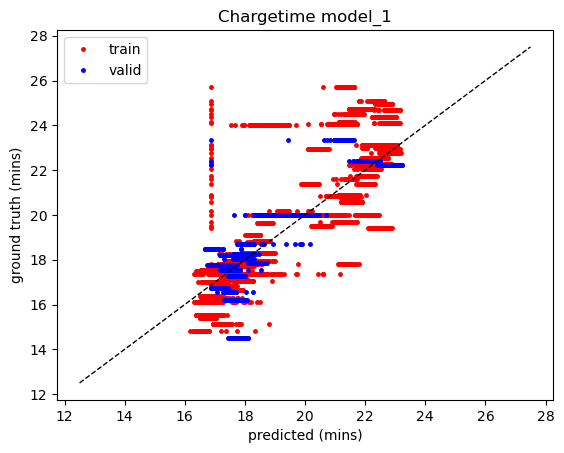

In [16]:
FILE = 'Model/ct_model1.pth'
ct_model1 = torch.load(FILE)
ct_model1.eval()
model_evaluate(ct_model1, batch_size=32, model_num=1)

Training set|RMSE: 1.13, MAPE: 0.04
Testing set|RMSE: 0.89, MAPE: 0.04


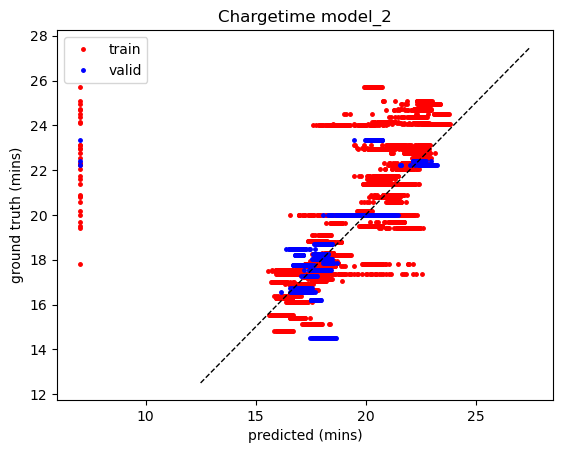

In [17]:
FILE = 'Model/ct_model2.pth'
ct_model2 = torch.load(FILE)
ct_model2.eval()
model_evaluate(ct_model2, batch_size=32, model_num=2)

Training set|RMSE: 1.03, MAPE: 0.05
Testing set|RMSE: 0.76, MAPE: 0.04


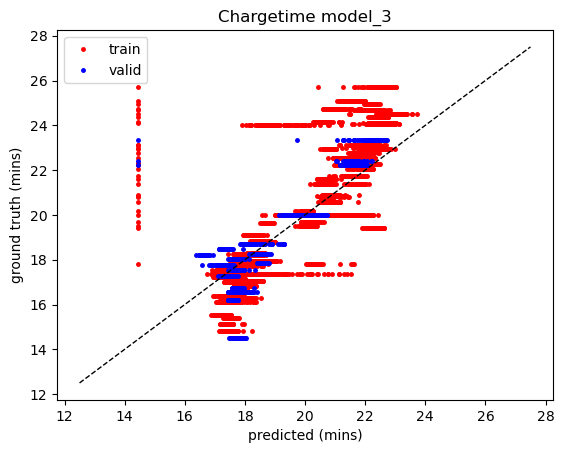

In [18]:
FILE = 'Model/ct_model3.pth'
ct_model3 = torch.load(FILE)
ct_model3.eval()
model_evaluate(ct_model3, batch_size=32, model_num=3)

Training set|RMSE: 1.04, MAPE: 0.05
Testing set|RMSE: 0.81, MAPE: 0.04


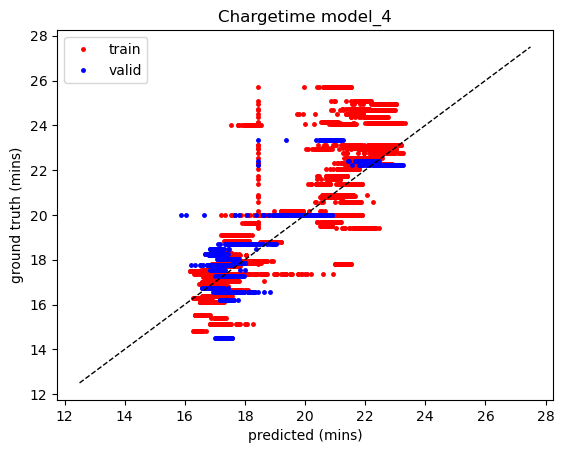

In [19]:
FILE = 'Model/ct_model4.pth'
ct_model4 = torch.load(FILE)
ct_model4.eval()
model_evaluate(ct_model4, batch_size=32, model_num=4)

Training set|RMSE: 0.75, MAPE: 0.03
Testing set|RMSE: 0.81, MAPE: 0.04


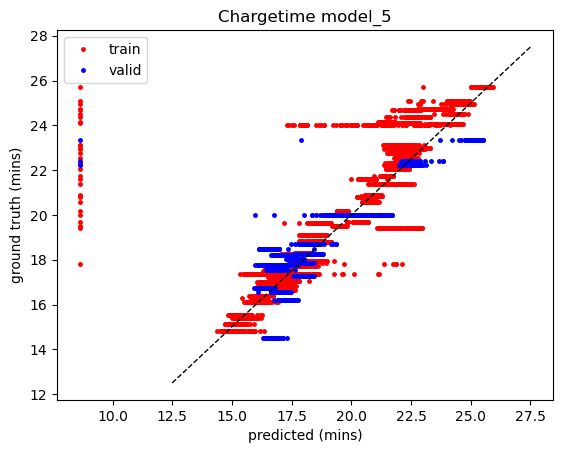

In [20]:
FILE = 'Model/ct_model5.pth'
ct_model5 = torch.load(FILE)
ct_model5.eval()
model_evaluate(ct_model5, batch_size=32, model_num=5)